In [9]:
import pandas as pd

df = pd.read_csv("data_clean.csv")
df.head()

,Diabetes_012,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack
0,1.0,4.0,0.0,23.0,10.0,1.0,0.0,5.0,0.0,0.0
1,0.0,3.0,1.0,28.0,9.0,1.0,0.0,6.0,0.0,0.0
2,0.0,4.0,0.0,28.0,8.0,1.0,0.0,5.0,0.0,0.0
3,0.0,2.0,0.0,27.0,6.0,0.0,0.0,3.0,0.0,0.0
4,1.0,4.0,1.0,28.0,11.0,0.0,1.0,2.0,0.0,0.0


In [10]:
age_recode = {
    1: 1, 2: 2,
    3: 3, 4: 3,  # Merging 30-34 and 35-39 into 30-39
    5: 4, 6: 4,  # Merging 40-44 and 45-49 into 40-49
    7: 5, 8: 5,  # Merging 50-54 and 55-59 into 50-59
    9: 6, 10: 6,  # Merging 60-64 and 65-70 into 60-69
    11: 7, 12: 7,  # Merging 70-74 and 75-79 into 70-79
    13: 8
}

df['Age'] = df['Age'].map(age_recode)
df['Age'].value_counts()

6    16351
5    11787
7    10672
4     6570
3     4364
8     4276
2     1177
1      956
Name: Age, dtype: int64

In [11]:
convert_columns = ['Diabetes_012', 'GenHlth', 'HighBP', 'Age', 'HighChol', 'DiffWalk', 'Income', 'HeartDiseaseorAttack']

for column in df.columns:
    if column in convert_columns:
        df[column] = df[column].astype('category')
df.dtypes

Diabetes_012            category
GenHlth                 category
HighBP                  category
BMI                      float64
Age                     category
HighChol                category
DiffWalk                category
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack    category
dtype: object

In [ ]:
# Diabetes_012:binary; GenHlth: 5 levels, 5 is poor; HighBP: binary; BMI: numerical; Age: 13->8 levels; 
# HighChol: binary; DiffWalk: binary; Income: 8 levels; PhysHlth: numerical; HeartDiseaseorAttack:binary

In [12]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'GenHlth', 'Age', 'Income' for later modeling
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['GenHlth', 'Age', 'Income']])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['GenHlth', 'Age', 'Income']))

# Drop the original columns and concatenate the encoded features
df = df.drop(['GenHlth', 'Age', 'Income'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# testing
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7453476983349657


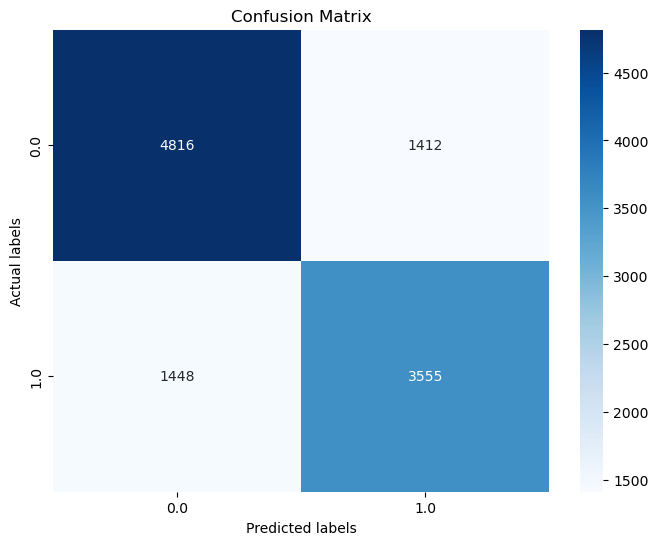

In [14]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

Random Forest Model Accuracy: 0.7042115572967679


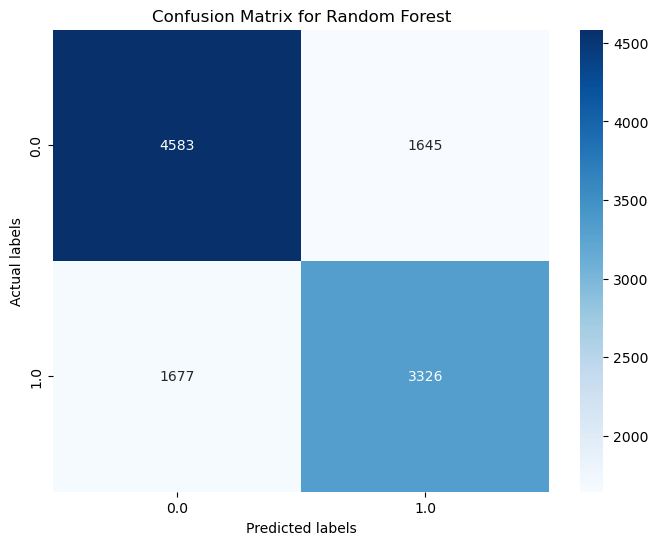

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# testing
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

SVM Model Accuracy: 0.7466832873297125


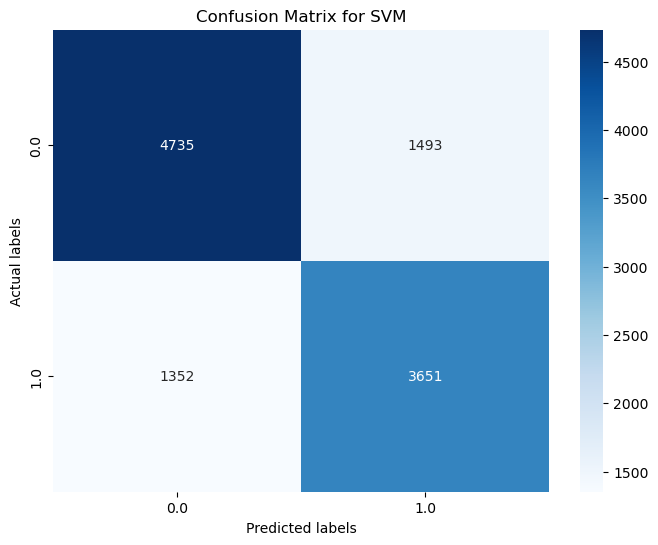

In [16]:
from sklearn.svm import SVC

# Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# testing
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")

# confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

/Users/chenyiqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Model Accuracy: 0.707238892351527


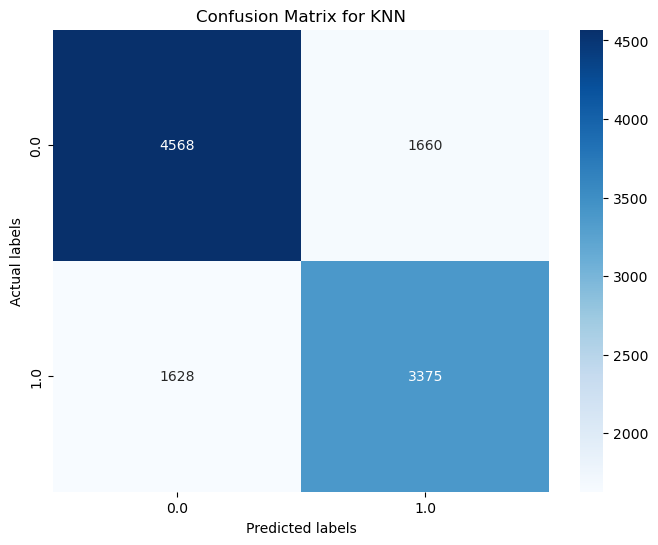

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors classifier; e.g., k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# testing
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn}")

# confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

Epoch 1/25
1124/1124 - 2s - loss: 0.5184 - accuracy: 0.7395 - val_loss: 0.5024 - val_accuracy: 0.7550 - 2s/epoch - 2ms/step
Epoch 2/25
1124/1124 - 1s - loss: 0.5090 - accuracy: 0.7455 - val_loss: 0.5042 - val_accuracy: 0.7497 - 1s/epoch - 1ms/step
Epoch 3/25
1124/1124 - 1s - loss: 0.5066 - accuracy: 0.7475 - val_loss: 0.5017 - val_accuracy: 0.7543 - 1s/epoch - 1ms/step
Epoch 4/25
1124/1124 - 1s - loss: 0.5054 - accuracy: 0.7476 - val_loss: 0.5027 - val_accuracy: 0.7535 - 1s/epoch - 1ms/step
Epoch 5/25
1124/1124 - 1s - loss: 0.5041 - accuracy: 0.7496 - val_loss: 0.5088 - val_accuracy: 0.7480 - 1s/epoch - 1ms/step
Epoch 6/25
1124/1124 - 1s - loss: 0.5032 - accuracy: 0.7506 - val_loss: 0.5057 - val_accuracy: 0.7515 - 1s/epoch - 1ms/step
Epoch 7/25
1124/1124 - 1s - loss: 0.5017 - accuracy: 0.7515 - val_loss: 0.5030 - val_accuracy: 0.7499 - 1s/epoch - 1ms/step
Epoch 8/25
1124/1124 - 1s - loss: 0.5003 - accuracy: 0.7518 - val_loss: 0.5052 - val_accuracy: 0.7527 - 1s/epoch - 1ms/step
Epoch 9/

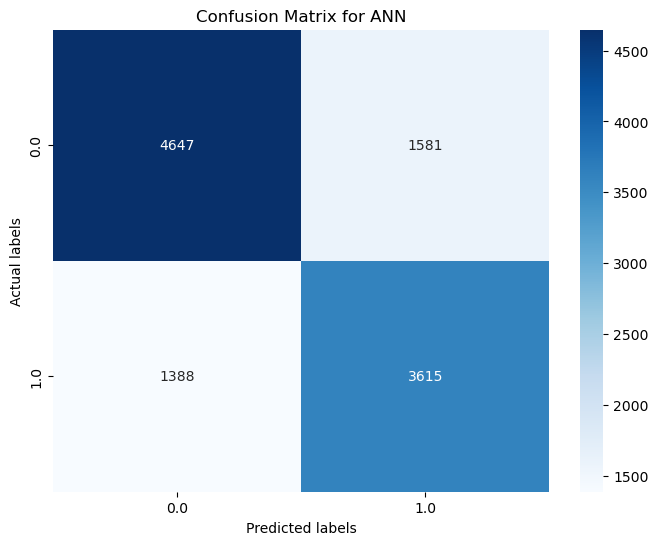

In [21]:
# Attempts on ANN (but it is more work)
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# scale the features (prep for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# make sure y is categorical (fixed)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# fit
history = model.fit(X_train_scaled, y_train_cat, epochs=25, batch_size=32, validation_split=0.2, verbose=2)

# testing
y_pred_ann = model.predict(X_test_scaled)
y_pred_ann = np.argmax(y_pred_ann, axis=1)  # Convert predictions from categorical back to original
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Model Accuracy: {accuracy_ann}")

# confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for ANN')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()